# Setup

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Results CSV

In [4]:
df = pd.read_csv('all_exp_df.csv')
df = df.drop(columns=[c for c in df.columns if 'Unnamed' in c])
df

,test_classifier_fit_time,test_feature_selector_fit_time,test_acc,test_mcc,test_roc_auc,test_pr_auc,test_mean_inference_time,dataset,n_samples,n_features_org,cv_method,learning_algorithm,filtering_algorithm,n_selected_features,selected_features_names,selected_features_scores
0,0.001552,0.014603,0.930556,0.848620,0.952340,0.958263,0.000714,ALLAML.csv,72,7129,LeaveOneOut(),GaussianNB,select_fdr_fs,1,1881,216.7237
1,0.001559,0.015855,0.958333,0.907651,0.994043,0.989402,0.000695,ALLAML.csv,72,7129,LeaveOneOut(),GaussianNB,select_fdr_fs,2,"1881,2287","216.7237,198.9983"
2,0.001659,0.017396,0.930556,0.848620,0.993191,0.988151,0.000736,ALLAML.csv,72,7129,LeaveOneOut(),GaussianNB,select_fdr_fs,3,"1881,2287,3251","216.7237,198.9983,185.3939"
3,0.001565,0.013124,0.958333,0.907651,0.993191,0.988151,0.000700,ALLAML.csv,72,7129,LeaveOneOut(),GaussianNB,select_fdr_fs,4,"1881,2287,3251,1833","216.7237,198.9983,185.3939,174.7985"
4,0.001660,0.014022,0.944444,0.877447,0.994894,0.990794,0.000736,ALLAML.csv,72,7129,LeaveOneOut(),GaussianNB,select_fdr_fs,5,"1881,2287,3251,1833,4846","216.7237,198.9983,185.3939,174.7985,155.4472"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78584,0.139613,703.013036,0.900000,0.816497,0.840000,0.776667,0.072681,singh_inputs.csv,102,12600,"StratifiedKFold(n_splits=10, random_state=42, ...",RandomForestClassifier,svm_fs_Aug,3,"6184,11857,7538","1.0000,0.9999,0.9998"
78585,0.128810,813.998643,0.900000,0.816497,1.000000,1.000000,0.062646,singh_inputs.csv,102,12600,"StratifiedKFold(n_splits=10, random_state=42, ...",RandomForestClassifier,svm_fs_Aug,3,"6184,7622,10233","1.0000,0.9999,0.9998"
78586,0.158858,646.426888,0.900000,0.816497,1.000000,1.000000,0.071802,singh_inputs.csv,102,12600,"StratifiedKFold(n_splits=10, random_state=42, ...",RandomForestClassifier,svm_fs_Aug,3,"6184,10671,10233","1.0000,0.9999,0.9998"
78587,0.118865,821.549181,1.000000,1.000000,1.000000,1.000000,0.058886,singh_inputs.csv,102,12600,"StratifiedKFold(n_splits=10, random_state=42, ...",RandomForestClassifier,svm_fs_Aug,3,"6184,7622,9092","1.0000,0.9999,0.9998"


# Datasets Statistics

In [31]:
stats_cols = ['dataset', 'cv_method', 'n_samples', 'n_features_org']
db_stats = df.groupby(stats_cols).size().reset_index()[stats_cols].sort_values(stats_cols)
db_stats

,dataset,cv_method,n_samples,n_features_org
0,ALL.csv,"StratifiedKFold(n_splits=10, random_state=42, ...",125,12625
1,ALLAML.csv,LeaveOneOut(),72,7129
2,Breast.csv,LeaveOneOut(),97,24481
3,CLL-SUB-111.csv,"StratifiedKFold(n_splits=10, random_state=42, ...",111,11340
4,CLL.csv,LeavePOut(p=2),22,12625
5,CNS.csv,LeaveOneOut(),60,7129
6,COIL20.csv,"StratifiedKFold(n_splits=5, random_state=42, s...",1440,1024
7,Carcinom.csv,"StratifiedKFold(n_splits=10, random_state=42, ...",153,9182
8,Lung.csv,"StratifiedKFold(n_splits=10, random_state=42, ...",197,12600
9,Lymphoma.csv,LeaveOneOut(),66,4026


# Analyze Metrics

## ROC_AUC

### Best Scores per Dataset

In [50]:
metric_col = 'test_roc_auc'

mean_df = df[~df['filtering_algorithm'].str.endswith('_Aug')].groupby(['dataset', 'filtering_algorithm', 'n_selected_features', 'learning_algorithm'])[metric_col].mean().reset_index()
auc_max_df = mean_df.groupby(['dataset']).max()[metric_col].reset_index().join(mean_df.set_index(['dataset', metric_col]), on=['dataset', metric_col])
auc_max_df = auc_max_df.groupby(['dataset'])[['filtering_algorithm', 'n_selected_features', 'learning_algorithm', metric_col]].first().reset_index()
auc_max_df

,dataset,filtering_algorithm,n_selected_features,learning_algorithm,test_roc_auc
0,ALL.csv,grey_wolf_fs,30,RandomForestClassifier,0.643864
1,ALLAML.csv,poly_svm_fs,15,KNeighborsClassifier,1.000000
2,Breast.csv,rbf_svm_fs,100,LogisticRegression,1.000000
3,CLL-SUB-111.csv,poly_svm_fs_New,100,RandomForestClassifier,0.913163
4,CLL.csv,poly_svm_fs,2,GaussianNB,1.000000
5,CNS.csv,rbf_svm_fs,100,LogisticRegression,1.000000
6,COIL20.csv,rfe_svm_fs,100,SVC,0.999992
7,Carcinom.csv,reliefF_fs,100,LogisticRegression,0.997411
8,Lung.csv,rfe_svm_fs,100,LogisticRegression,0.996389
9,Lymphoma.csv,poly_svm_fs,25,SVC,1.000000


In [51]:
auc_max_df['filtering_algorithm'].value_counts()

poly_svm_fs         9
grey_wolf_fs        3
rbf_svm_fs          3
rfe_svm_fs          2
svm_fs              2
poly_svm_fs_New     1
reliefF_fs          1
grey_wolf_fs_New    1
mrmr_fs             1
svm_fs_New          1
Name: filtering_algorithm, dtype: int64

### Scores Histograms per Filtering Algorithm

<AxesSubplot:xlabel='test_roc_auc', ylabel='Count'>

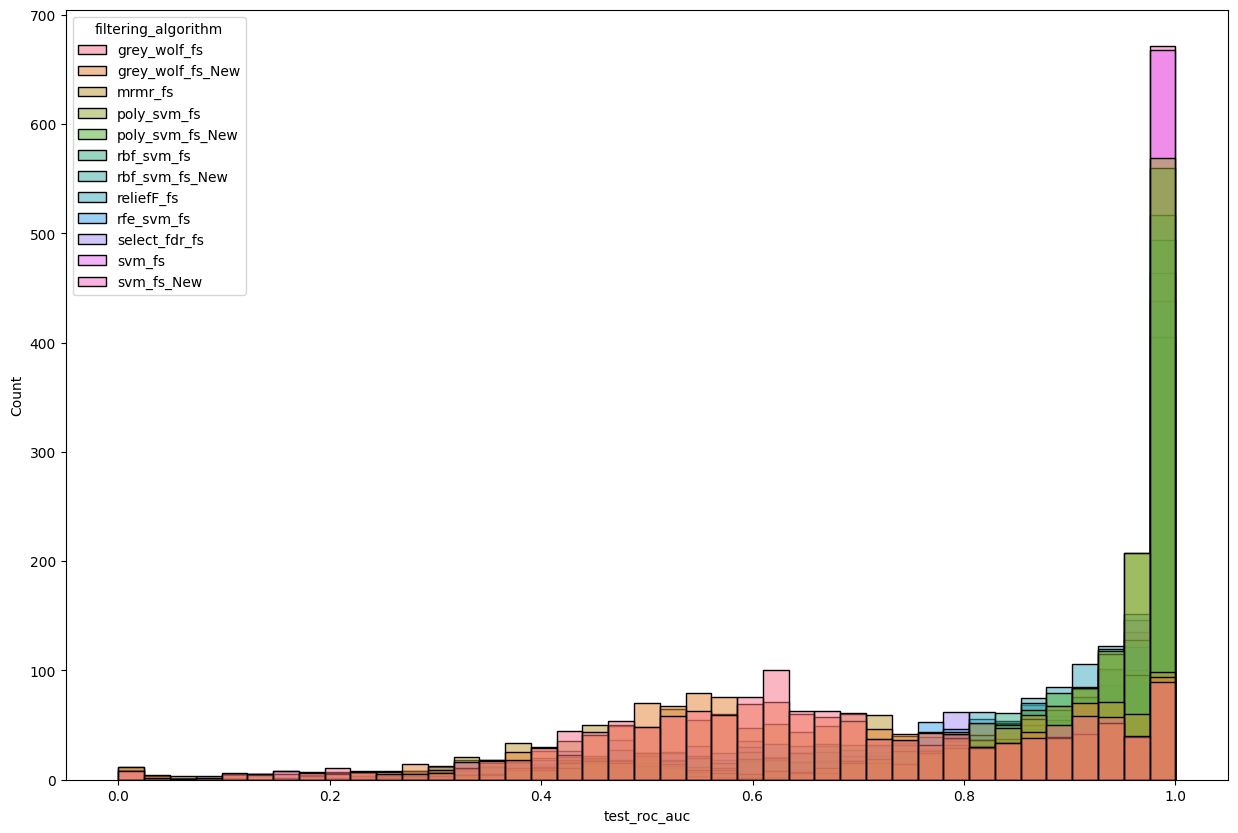

In [25]:
plt.figure(figsize=(15,10))
sns.histplot(data=mean_df, x=metric_col, hue="filtering_algorithm")

# Accuracy

## Best Scores per Dataset

In [52]:
metric_col = 'test_acc'

mean_df = df[~df['filtering_algorithm'].str.endswith('_Aug')].groupby(['dataset', 'filtering_algorithm', 'n_selected_features', 'learning_algorithm'])[metric_col].mean().reset_index()
acc_max_df = mean_df.groupby(['dataset']).max()[metric_col].reset_index().join(mean_df.set_index(['dataset', metric_col]), on=['dataset', metric_col])
acc_max_df = acc_max_df.groupby(['dataset'])[['filtering_algorithm', 'n_selected_features', 'learning_algorithm', metric_col]].first().reset_index()
acc_max_df

,dataset,filtering_algorithm,n_selected_features,learning_algorithm,test_acc
0,ALL.csv,select_fdr_fs,20,RandomForestClassifier,0.826282
1,ALLAML.csv,poly_svm_fs,15,KNeighborsClassifier,1.000000
2,Breast.csv,rbf_svm_fs,100,LogisticRegression,1.000000
3,CLL-SUB-111.csv,poly_svm_fs,100,RandomForestClassifier,0.837879
4,CLL.csv,poly_svm_fs,2,GaussianNB,1.000000
5,CNS.csv,rbf_svm_fs,100,LogisticRegression,1.000000
6,COIL20.csv,svm_fs_New,100,RandomForestClassifier,0.997917
7,Carcinom.csv,poly_svm_fs_New,100,LogisticRegression,0.935417
8,Lung.csv,svm_fs,100,KNeighborsClassifier,0.964211
9,Lymphoma.csv,poly_svm_fs,30,SVC,1.000000


In [53]:
acc_max_df['filtering_algorithm'].value_counts()

poly_svm_fs        11
rbf_svm_fs          4
select_fdr_fs       2
svm_fs_New          2
grey_wolf_fs        2
poly_svm_fs_New     1
svm_fs              1
mrmr_fs             1
Name: filtering_algorithm, dtype: int64

## Scores Histograms per Filtering Algorithm

<AxesSubplot:xlabel='test_acc', ylabel='Count'>

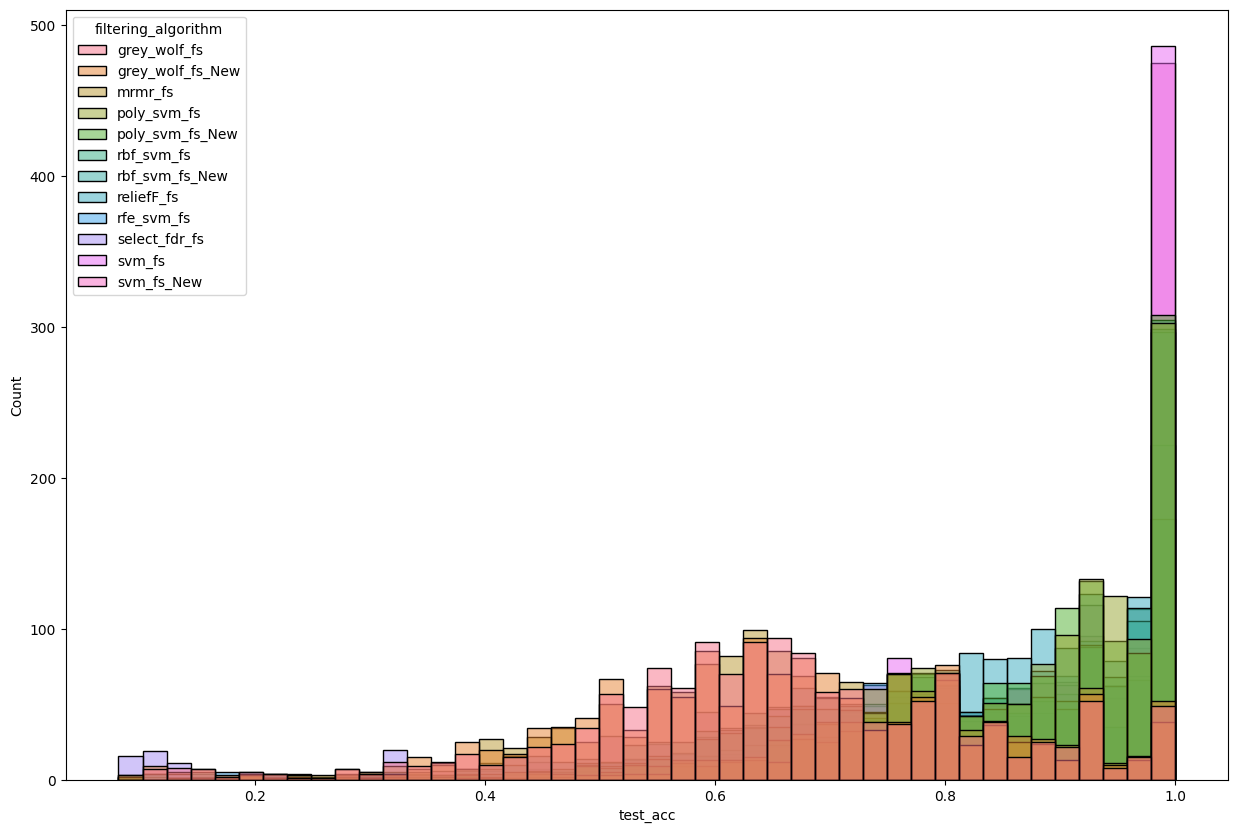

In [14]:
plt.figure(figsize=(15,10))
sns.histplot(data=mean_df, x=metric_col, hue="filtering_algorithm")

# Fit time

## Best Feature-Selection Fit Time per Dataset

In [54]:
metric_col = 'test_feature_selector_fit_time'

fs_df = df[~df['filtering_algorithm'].str.endswith('_Aug')].groupby(['dataset', 'filtering_algorithm'])[metric_col].max().reset_index()
fit_time_min_df = fs_df.groupby(['dataset']).min()[metric_col].reset_index().join(fs_df.set_index(['dataset', metric_col]), on=['dataset', metric_col])
fit_time_min_df = fit_time_min_df.groupby(['dataset'])[['filtering_algorithm', metric_col]].first().reset_index()
fit_time_min_df

,dataset,filtering_algorithm,test_feature_selector_fit_time
0,ALL.csv,select_fdr_fs,0.154255
1,ALLAML.csv,select_fdr_fs,0.075487
2,Breast.csv,select_fdr_fs,0.189027
3,CLL-SUB-111.csv,select_fdr_fs,0.091319
4,CLL.csv,reliefF_fs,0.037594
5,CNS.csv,select_fdr_fs,0.086190
6,COIL20.csv,select_fdr_fs,0.105482
7,Carcinom.csv,select_fdr_fs,0.147639
8,Lung.csv,select_fdr_fs,0.320681
9,Lymphoma.csv,select_fdr_fs,0.019393


In [55]:
fit_time_min_df['filtering_algorithm'].value_counts()

select_fdr_fs    23
reliefF_fs        1
Name: filtering_algorithm, dtype: int64

## Feature-Selection Fit Time Histograms

<AxesSubplot:xlabel='test_feature_selector_fit_time', ylabel='Count'>

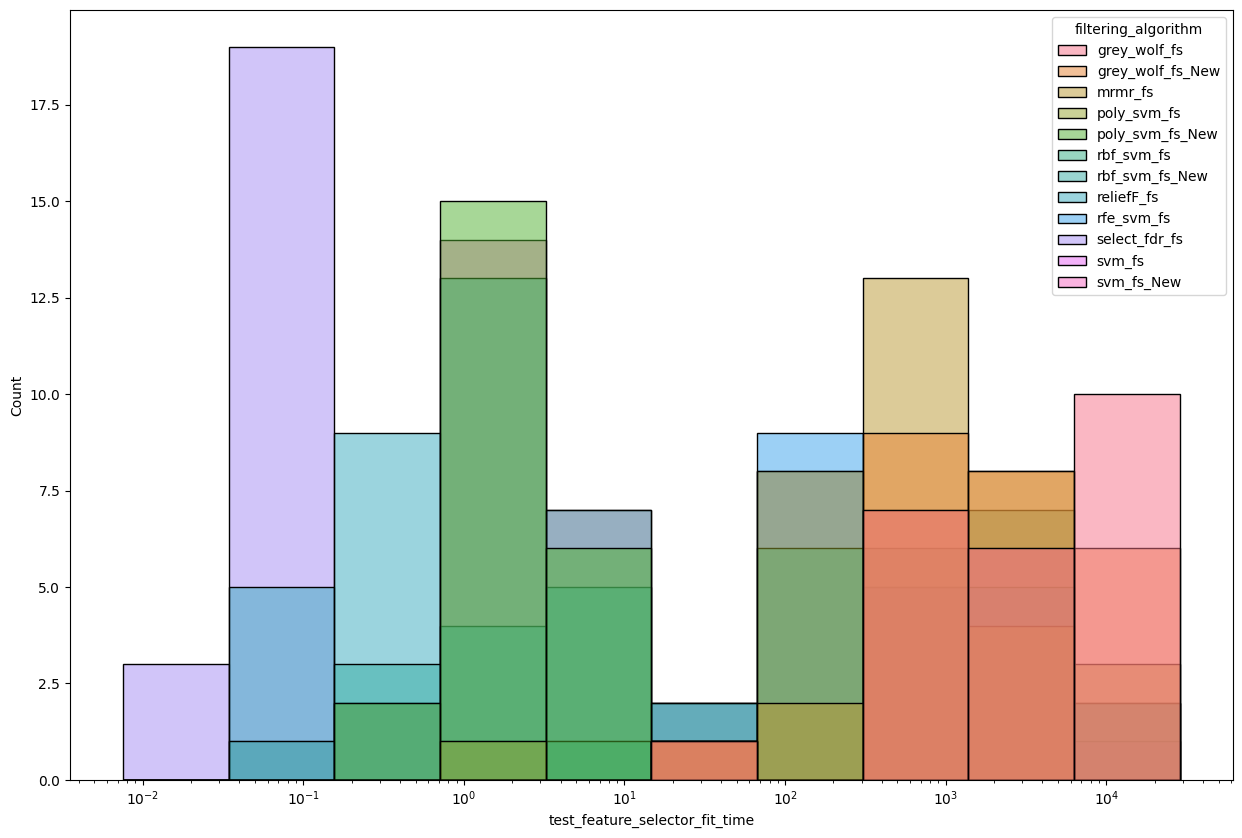

In [262]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.histplot(data=fs_df, x=metric_col, hue="filtering_algorithm", log_scale=True)

## Combine Results

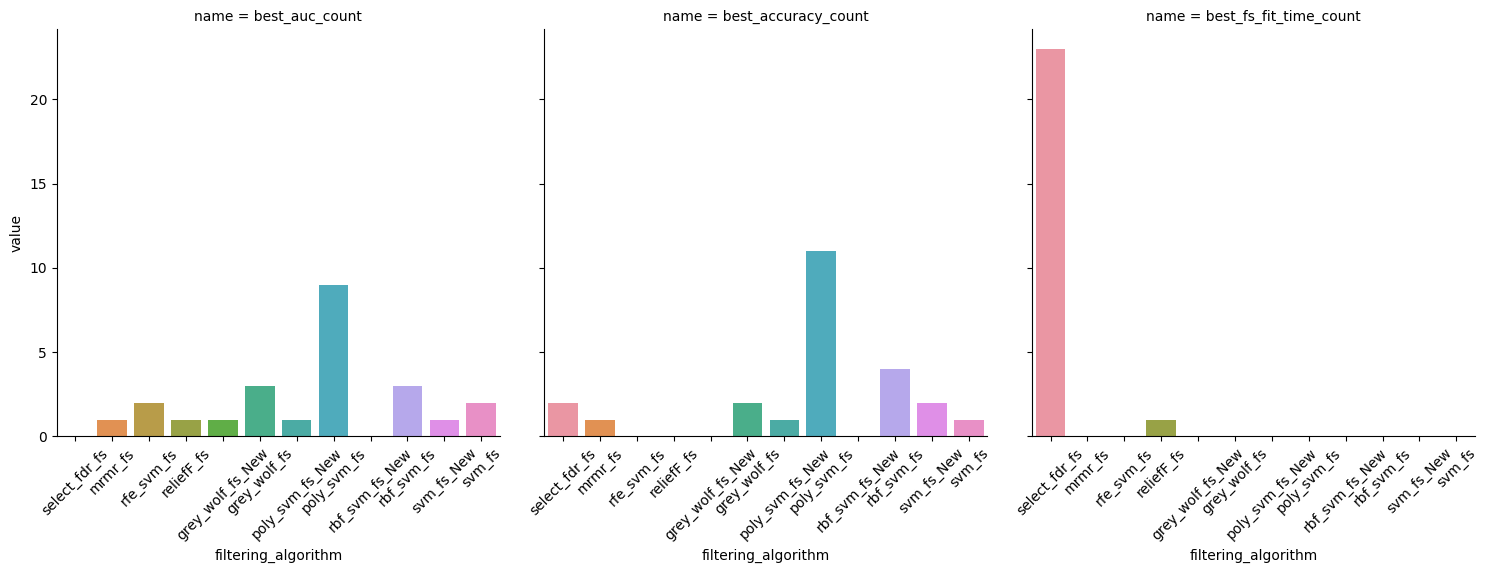

In [103]:
fs_stats = df[~df['filtering_algorithm'].str.endswith('_Aug')][['filtering_algorithm']].drop_duplicates()
fs_stats['best_auc_count'] = fs_stats['filtering_algorithm'].map(auc_max_df['filtering_algorithm'].value_counts())
fs_stats['best_accuracy_count'] = fs_stats['filtering_algorithm'].map(acc_max_df['filtering_algorithm'].value_counts())
fs_stats['best_fs_fit_time_count'] = fs_stats['filtering_algorithm'].map(fit_time_min_df['filtering_algorithm'].value_counts())
fs_stats = fs_stats.fillna(0).set_index('filtering_algorithm').stack().reset_index()
fs_stats.columns = ['filtering_algorithm', 'name', 'value']

g = sns.catplot(x='filtering_algorithm', y='value', col='name', data=fs_stats, kind='bar')
for i, ax in enumerate(g.fig.axes):   ## getting all axes of the fig object
     ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

# Compare Original and New Versions

In [227]:
agg = {'test_roc_auc': 'mean', 'test_acc': 'mean'}
rename = {k:f'new_{k}' for k in agg.keys()}
experiment_cols = ['dataset', 'filtering_algorithm', 'n_selected_features', 'learning_algorithm'] # filtering_algorithm
new_df = df[df['filtering_algorithm'].str.endswith('_New')].groupby(experiment_cols).agg(agg).reset_index().rename(columns=rename)
new_df['filtering_algorithm'] = new_df['filtering_algorithm'].map(lambda x: x[:-len('_New')])

cmp_df = new_df.join(df.groupby(experiment_cols).agg(agg).reset_index().set_index(experiment_cols), on=experiment_cols)

stats = []
for k in agg.keys():
    for org_fs in cmp_df['filtering_algorithm'].unique():
        new_fs = f'{org_fs}_New'
        fs_df = cmp_df[(cmp_df['filtering_algorithm'] == org_fs) & (cmp_df[k] > 0)]
        is_better = (fs_df[f'new_{k}'] > fs_df[k])
        fs_df[f'better_mode_{k}'] = is_better.map(lambda x: 'New' if x else 'Original')
        fs_df[f'new_vs_org_{k}_percentage'] = fs_df.apply(lambda x: (100 * x[f'new_{k}'] / x[k]), axis=1)
        stats.append({
            'metric': k,
            'filtering_algorithm': org_fs,
            'frac_new_improved': len(fs_df[is_better]) / len(fs_df),
            'mean_new_vs_org_percentage': fs_df[f'new_vs_org_{k}_percentage'].mean()
        })
metrics_stats_df = pd.DataFrame(stats)
metrics_stats_df

C:\Users\adutl\AppData\Local\Temp\ipykernel_1232\3468443499.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\adutl\AppData\Local\Temp\ipykernel_1232\3468443499.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\adutl\AppData\Local\Temp\ipykernel_1232\3468443499.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,metric,filtering_algorithm,frac_new_improved,mean_new_vs_org_percentage
0,test_roc_auc,grey_wolf_fs,0.442428,103.955091
1,test_roc_auc,poly_svm_fs,0.356944,99.660429
2,test_roc_auc,rbf_svm_fs,0.337500,99.662274
3,test_roc_auc,svm_fs,0.350694,99.739867
4,test_acc,grey_wolf_fs,0.412500,99.953248
5,test_acc,poly_svm_fs,0.336806,99.867988
6,test_acc,rbf_svm_fs,0.300694,99.803939
7,test_acc,svm_fs,0.303472,99.961602


# Fit time

In [229]:
agg = {'test_feature_selector_fit_time': 'max'}
rename = {k:f'new_{k}' for k in agg.keys()}
experiment_cols = ['dataset', 'filtering_algorithm']
new_df = df[df['filtering_algorithm'].str.endswith('_New')].groupby(experiment_cols).agg(agg).reset_index().rename(columns=rename)
new_df['filtering_algorithm'] = new_df['filtering_algorithm'].map(lambda x: x[:-len('_New')])

cmp_df = new_df.join(df.groupby(experiment_cols).agg(agg).reset_index().set_index(experiment_cols), on=experiment_cols)

stats = []
for k in agg.keys():
    for org_fs in cmp_df['filtering_algorithm'].unique():
        new_fs = f'{org_fs}_New'
        fs_df = cmp_df[(cmp_df['filtering_algorithm'] == org_fs) & (cmp_df[k] > 0)]
        is_better = (fs_df[f'new_{k}'] < fs_df[k])
        fs_df[f'better_mode_{k}'] = is_better.map(lambda x: 'New' if x else 'Original')
        fs_df[f'new_vs_org_{k}_percentage'] = fs_df.apply(lambda x: (100 * x[f'new_{k}'] / x[k]), axis=1)
        stats.append({
            'metric': k,
            'filtering_algorithm': org_fs,
            'frac_new_improved': len(fs_df[is_better]) / len(fs_df),
            'mean_new_vs_org_percentage': fs_df[f'new_vs_org_{k}_percentage'].mean()
        })
fit_time_stats_df = pd.DataFrame(stats)
fit_time_stats_df

C:\Users\adutl\AppData\Local\Temp\ipykernel_1232\1504480098.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\adutl\AppData\Local\Temp\ipykernel_1232\1504480098.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\adutl\AppData\Local\Temp\ipykernel_1232\1504480098.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,metric,filtering_algorithm,frac_new_improved,mean_new_vs_org_percentage
0,test_feature_selector_fit_time,grey_wolf_fs,0.583333,102.129798
1,test_feature_selector_fit_time,poly_svm_fs,1.000000,1.092098
2,test_feature_selector_fit_time,rbf_svm_fs,1.000000,0.941075
3,test_feature_selector_fit_time,svm_fs,1.000000,1.520919


# Compare Original vs Augmented Experiments

In [232]:
agg = {'test_roc_auc': 'mean', 'test_acc': 'mean', 'test_classifier_fit_time': 'mean'}
rename = {k:f'aug_{k}' for k in agg.keys()}
experiment_cols = ['dataset', 'filtering_algorithm', 'n_selected_features', 'learning_algorithm'] # filtering_algorithm
aug_df = df[df['filtering_algorithm'].str.endswith('_Aug')].groupby(experiment_cols).agg(agg).reset_index().rename(columns=rename)
aug_df['filtering_algorithm'] = aug_df['filtering_algorithm'].map(lambda x: x[:-len('_Aug')])

cmp_df = aug_df.join(df.groupby(experiment_cols).agg(agg).reset_index().set_index(experiment_cols), on=experiment_cols)

stats = []
for k in agg.keys():
    is_better = (cmp_df[f'aug_{k}'] < cmp_df[k]) if 'time' in k else (cmp_df[f'aug_{k}'] > cmp_df[k])
    cmp_df[f'better_mode_{k}'] = is_better.map(lambda x: 'Augmented' if x else 'Original')
    cmp_df[f'aug_vs_org_{k}_percentage'] = cmp_df.apply(lambda x: (100 * x[f'aug_{k}'] / x[k]), axis=1)
    stats.append({
        'metric': k,
        'frac_aug_improved': len(cmp_df[is_better]) / len(cmp_df),
        'all_mean_aug_vs_org_percentage': cmp_df[f'aug_vs_org_{k}_percentage'].mean()
    })
stats_df = pd.DataFrame(stats)
stats_df

,metric,frac_aug_improved,all_mean_aug_vs_org_percentage
0,test_roc_auc,0.208333,96.411472
1,test_acc,0.375000,98.325933
2,test_classifier_fit_time,0.541667,106.256998


# Friedman PostHoc Test

rejected null hypothesis
algorithm poly_svm_fs is significantly better than algorithms {'select_fdr_fs', 'reliefF_fs', 'svm_fs_New', 'svm_fs', 'mrmr_fs', 'rbf_svm_fs_New', 'grey_wolf_fs', 'grey_wolf_fs_New', 'rfe_svm_fs', 'rbf_svm_fs'} in terms of test_roc_auc
algorithm poly_svm_fs_New is significantly better than algorithms {'select_fdr_fs', 'reliefF_fs', 'svm_fs_New', 'svm_fs', 'mrmr_fs', 'rbf_svm_fs_New', 'grey_wolf_fs', 'grey_wolf_fs_New', 'rfe_svm_fs', 'rbf_svm_fs'} in terms of test_roc_auc
algorithm rbf_svm_fs is significantly better than algorithms {'mrmr_fs', 'grey_wolf_fs', 'grey_wolf_fs_New'} in terms of test_roc_auc
algorithm rbf_svm_fs_New is significantly better than algorithms {'mrmr_fs', 'grey_wolf_fs', 'grey_wolf_fs_New'} in terms of test_roc_auc
algorithm reliefF_fs is significantly better than algorithms {'mrmr_fs', 'grey_wolf_fs', 'grey_wolf_fs_New', 'rfe_svm_fs'} in terms of test_roc_auc
algorithm rfe_svm_fs is significantly better than algorithms {'mrmr_fs', 'grey_

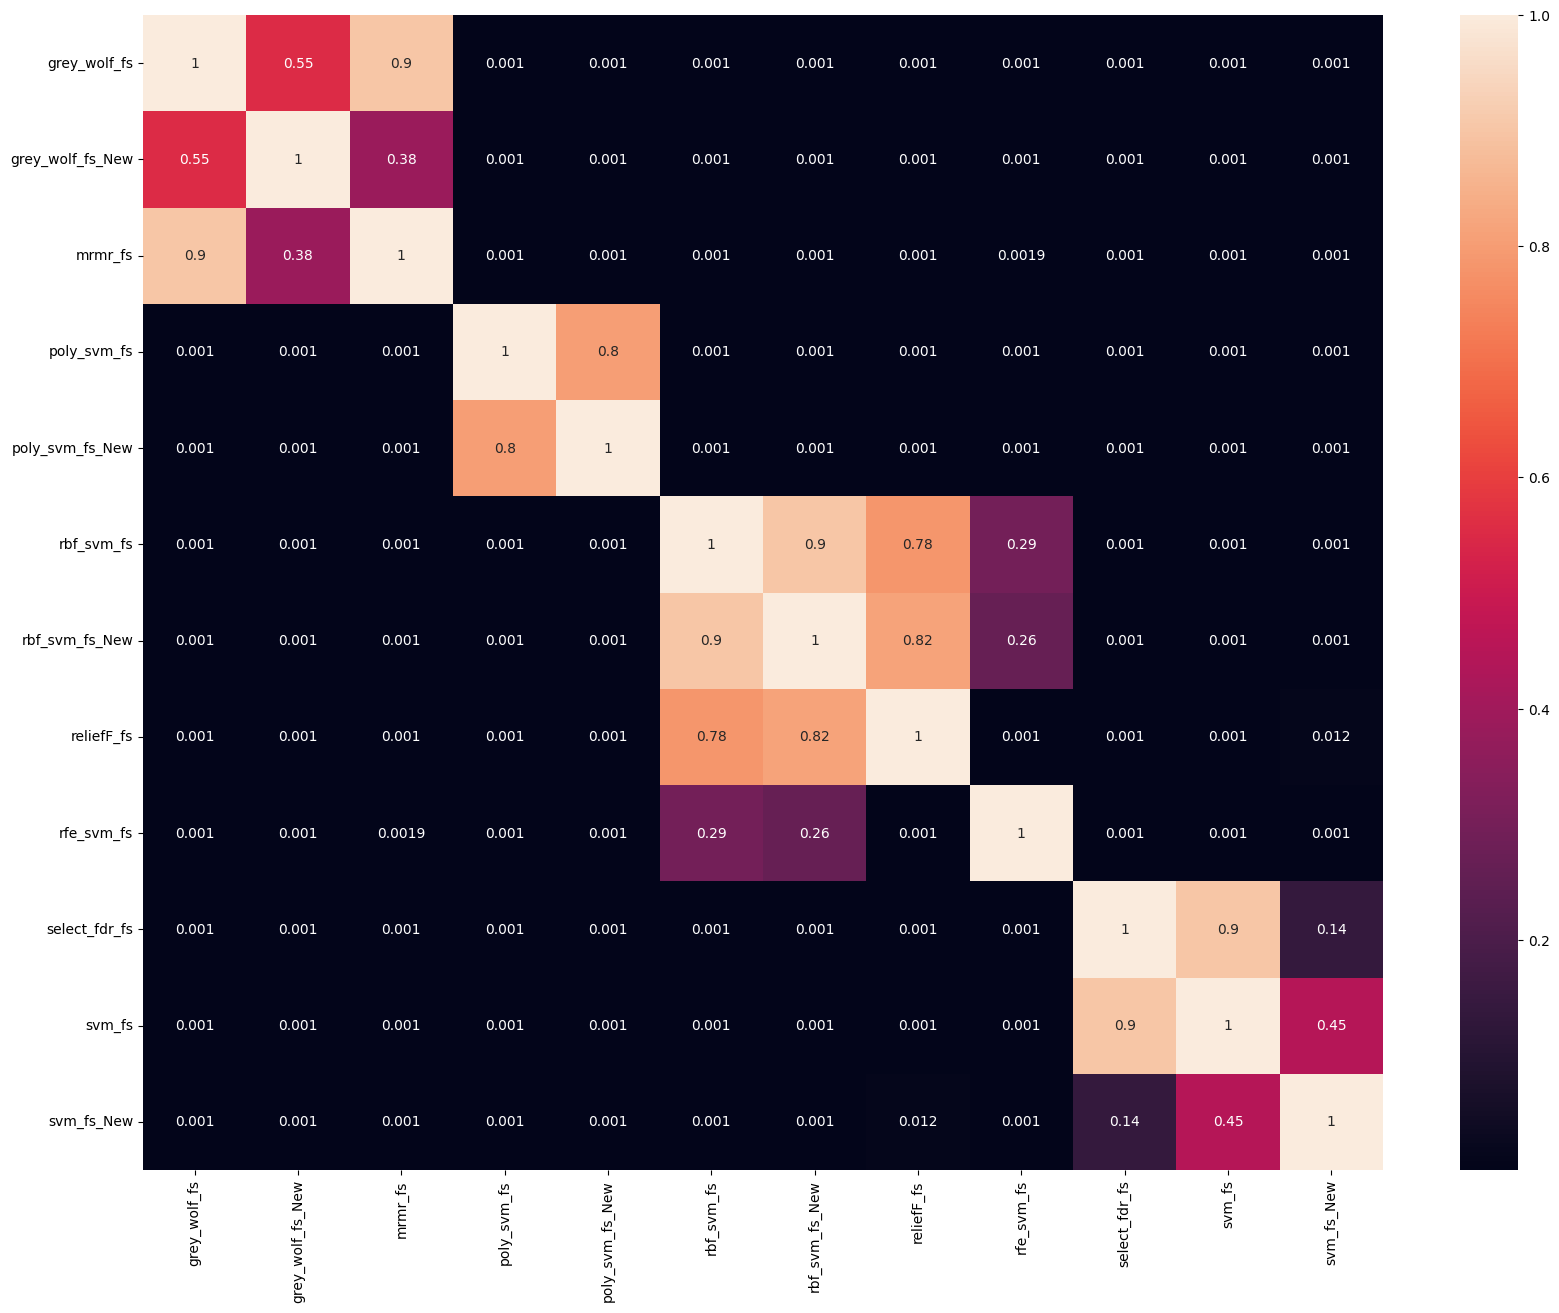

In [151]:
from friedman_posthoc_test import friedman_posthoc_test
friedman_posthoc_test(df[~df['filtering_algorithm'].str.endswith('_Aug')])